# Depression Detection using Deep Learing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Downloading kaggle library for download of dataset
The kaggle library is downloaded using pip install and the dataset is downloaded and stored. Next, the downloaded zip file is unzipped


In [ ]:
!pip install -q kaggle

In [ ]:
 ! mkdir ~/.kaggle
 ! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download 'tocodeforsoul/depression-rest-preprocessed'

 18% 360M/2.00G [00:03<00:17, 104MB/s]
User cancelled operation


In [ ]:
!unzip depression-rest-preprocessed.zip

## Importing of required libraries
The following libraries are imported


*   pandas - import of dataset
*   matplotlib.pyplot - plotting graphs for the trained models
*   numpy - array operations and label creation
*   keras - creating the Deep Learning models





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint

## Reading the dataset
### Labels
First the unnecessary IDs are noted (Either the records do not exist, or have erroneous records)

Next, the labels dataset is loaded and the unnecessary IDs are removed.

The BDI (Beck Depression Inventory) values are loaded, which act as the labels. The scores gotten are converted to 0-3 based on their severity. The ranges are as follows


*   0–13 is considered minimal range
*   14–19 is mild
*   20–28 is moderate
*   29–63 is severe

This project considers minimal range to be a normal patient and other ranges to be depressed patients

The code snippet below is to take the labels corresponding to each patient. The data is processed later and the labels are also correspondingly changed. The changed labels are sotred in the database.




In [ ]:
# users_to_remove = [544, 522, 539, 571, 572, 613]
# ids = [i for i in range(507, 629) if i not in users_to_remove]
# labels_data = pd.read_excel('/content/drive/MyDrive/Data_4_Import_REST.xlsx')
# labels_data = labels_data.drop(labels_data.index[[id - 507 for id in users_to_remove]])
# labels_list = []
# label_name = ['minimal', 'mild', 'moderate', 'severe']
# for BDI in labels_data['BDI']:
#   if not np.isnan(BDI):
#     if BDI >= 0 and BDI <= 13:
#       labels_list.append(0)
#     else:
#       labels_list.append(1)
# labels = np.array(labels_list)
# del labels_data
# del labels_list
# del ids
# labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

### Data
The data is organized in the form of files (which are numpy arrays). The files are read for the necessary IDs and are stored in a list

Uncomment the below 2 code lines to manually read the files and store it in drive (Only needs to be done the first time the code is executed)

If the data has already been stored in your drive, run the code as it is

All the processing and conversion of data is done using the commented code and stored in Google Drive.

In [ ]:
# LOAD DATA MANUALLY FROM EACH FILE

# data = []
# for id in range(507, 629):
#   if id not in users_to_remove:
#     file_name = '/content/' + str(id) + "_Depression_REST-epo-feat-v1.npy"
#     data.append(np.load(file_name, allow_pickle=True))
# data

In [ ]:
# STORE THE DATA IN GOOGLE DRIVE

# np_data = np.array(data)
# np.save('/content/drive/MyDrive/data_from_file.npy', data, allow_pickle=True)

In [ ]:
# data = np.load('/content/drive/MyDrive/data_from_file.npy', allow_pickle=True)

Each user data consists of 12 events. Each event has 122 or 30 ms of data measured on 62 channels, having 31 features each.

The data was restructured to have 62 x 31 values for each user. The processed data is stored in a list

The data is processed and stored in Google drive

Run the commented code only if the data is not available in your drive

In [ ]:
# processed_data = []
# processed_labels = []
# for user_id in range(len(data)):
#   user = data[user_id]
#   for event in user:
#     for event_data in event:
#       temp = [val for channel in event_data for val in channel]
#       processed_labels.append(labels[user_id])
#       processed_data.append(temp)
# np.save('/content/drive/MyDrive/processed_data.npy', processed_data, allow_pickle=True)
# np.save('/content/drive/MyDrive/processed_labels.npy', processed_labels, allow_pickle=True)

In [ ]:
processed_data = np.load('/content/drive/MyDrive/processed_data.npy', allow_pickle=True)
processed_labels = np.load('/content/drive/MyDrive/processed_labels.npy', allow_pickle=True)

In [ ]:
print(processed_data.shape)
print(processed_labels.shape)

(104862, 1922)
(104862,)


### Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_data, processed_labels, train_size=0.9, shuffle=True)

In [ ]:
print("Training data dimensions")
print(X_train.shape)
print(y_train.shape)
print("Testing data dimensions")
print(X_test.shape)
print(y_test.shape)
y_train

Training data dimensions
(94375, 1922)
(94375,)
Testing data dimensions
(10487, 1922)
(10487,)


array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
np.save('/content/drive/MyDrive/DepressionDetection/X_train.npy', X_train, allow_pickle=True)
np.save('/content/drive/MyDrive/DepressionDetection/X_test.npy', X_test, allow_pickle=True)
np.save('/content/drive/MyDrive/DepressionDetection/y_train.npy', y_train, allow_pickle=True)
np.save('/content/drive/MyDrive/DepressionDetection/y_test.npy', y_test, allow_pickle=True)

In [ ]:
X_train = np.load('/content/drive/MyDrive/DepressionDetection/X_train.npy', allow_pickle=True)
X_test = np.load('/content/drive/MyDrive/DepressionDetection/X_test.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/DepressionDetection/y_train.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/DepressionDetection/y_test.npy', allow_pickle=True)

In [ ]:
validation_data_1 = X_test[0]
validation_data_2 = X_test[1]
validation_label_1 = y_test[0]
validation_label_2 = y_test[1]

## Deep learning algorithms

### Feed forward deep neural network

In [ ]:
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

Feed forward Deep Neural Network

In [ ]:
deep_nn = Sequential()

deep_nn.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
deep_nn.add(Dense(128, activation="relu"))
deep_nn.add(Dense(248, activation="relu"))
deep_nn.add(Dense(128, activation="relu"))
deep_nn.add(Dense(64, activation="relu"))
deep_nn.add(Dense(1, activation="sigmoid"))

deep_nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                123072    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 248)               31992     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               31872     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 203,577
Trainable params: 203,577
Non-trainable params: 0
________________________________________________

In [ ]:
deep_nn.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history_dnn = deep_nn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
2950/2950 [==============================] - 15s 5ms/step - loss: 0.7808 - accuracy: 0.6456 - val_loss: 0.6345 - val_accuracy: 0.6714
Epoch 2/100
2950/2950 [==============================] - 14s 5ms/step - loss: 0.6172 - accuracy: 0.6804 - val_loss: 0.5676 - val_accuracy: 0.6901
Epoch 3/100
2950/2950 [==============================] - 13s 5ms/step - loss: 0.5540 - accuracy: 0.7060 - val_loss: 0.5170 - val_accuracy: 0.7280
Epoch 4/100
2950/2950 [==============================] - 14s 5ms/step - loss: 0.5110 - accuracy: 0.7348 - val_loss: 0.5032 - val_accuracy: 0.7421
Epoch 5/100
2950/2950 [==============================] - 14s 5ms/step - loss: 0.4905 - accuracy: 0.7482 - val_loss: 0.4796 - val_accuracy: 0.7596
Epoch 6/100
2950/2950 [==============================] - 14s 5ms/step - loss: 0.4750 - accuracy: 0.7611 - val_loss: 0.4769 - val_accuracy: 0.7558
Epoch 7/100
2950/2950 [==============================] - 14s 5ms/step - loss: 0.4560 - accuracy: 0.7711 - val_loss: 0.4581 -

In [ ]:
deep_nn.save("/content/drive/MyDrive/DepressionDetection/deep_nn.h5")

In [ ]:
deep_nn = keras.models.load_model("/content/drive/MyDrive/DepressionDetection/deep_nn.h5")
deep_nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                123072    
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 248)               31992     
                                                                 
 dense_12 (Dense)            (None, 128)               31872     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 203,577
Trainable params: 203,577
Non-tr

In [ ]:
y_pred_model = deep_nn.predict(X_test)
y_pred = []
for predicted in y_pred_model:
  y_pred.append(round(predicted[0]))
print(y_pred)

[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6652
           1       0.86      0.90      0.88      3835

    accuracy                           0.91     10487
   macro avg       0.90      0.91      0.90     10487
weighted avg       0.91      0.91      0.91     10487



In [ ]:
deep_nn.evaluate(X_test, y_test)

328/328 [==============================] - 1s 2ms/step - loss: 0.2301 - accuracy: 0.9107


[0.23011307418346405, 0.9107466340065002]

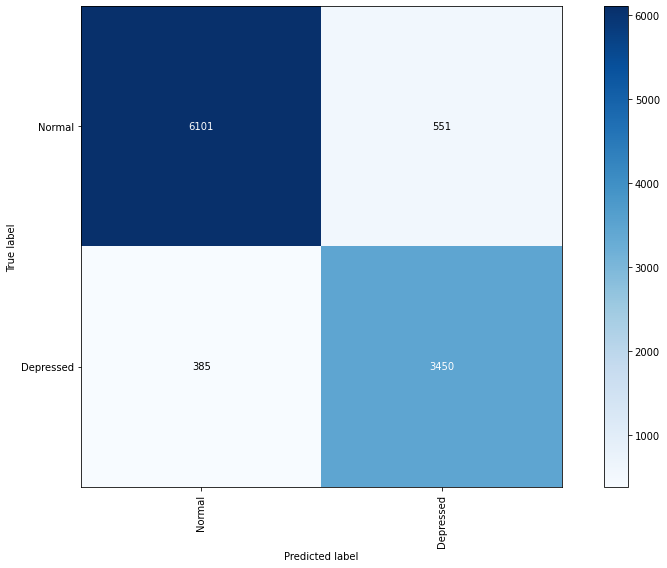

In [ ]:
deep_nn_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(deep_nn_cm, ["Normal", "Depressed"])

In [ ]:
print("TEST 1")
predicted_label_1 = deep_nn.predict([list(validation_data_1)])
print("Original label = " + str(validation_label_1))
print("Predicted label = " + str(predicted_label_1[0][0]))

TEST 1
Original label = 1
Predicted label = 1.0


In [ ]:
print("TEST 2")
predicted_label_2 = deep_nn.predict([list(validation_data_2)])
print("Original label = " + str(validation_label_2))
print("Predicted label = " + str(predicted_label_2[0][0]))

TEST 2
Original label = 1
Predicted label = 1.0


### Simple RNN

Reshaping the input to use for RNNs and Conv1D

In [ ]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
validation_data_reshaped_1 = X_test_reshaped[0]
validation_data_reshaped_2 = X_test_reshaped[1]

Adding a checkpoint to ease the training

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DepressionDetection/SimRNN', monitor='val_accuracy', save_best_only=False, save_weights_only=False, mode='auto', save_freq="epoch")

In [ ]:
sim_rnn = Sequential()

sim_rnn.add(SimpleRNN(10, input_shape=(X_train.shape[1],1), activation="relu", return_sequences=True))
sim_rnn.add(SimpleRNN(20, activation="relu"))
sim_rnn.add(Dense(10, activation="relu"))
sim_rnn.add(Dense(1, activation="sigmoid"))

sim_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1922, 10)          120       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                620       
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sim_rnn.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
sim_rnn = keras.models.load_model('/content/drive/MyDrive/DepressionDetection/SimRNN')

In [ ]:
sim_rnn.fit(X_train_reshaped, y_train, epochs=20, validation_data=(X_test_reshaped, y_test), callbacks=[checkpoint])


Epoch 1/20
2950/2950 [==============================] - 2529s 857ms/step - loss: 0.8481 - accuracy: 0.6348 - val_loss: 0.6486 - val_accuracy: 0.6343
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/SimRNN/assets
Epoch 2/20
2950/2950 [==============================] - 2612s 885ms/step - loss: 0.6610 - accuracy: 0.6377 - val_loss: 0.6528 - val_accuracy: 0.6343
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/SimRNN/assets
Epoch 3/20
2950/2950 [==============================] - 2643s 896ms/step - loss: 0.6486 - accuracy: 0.6378 - val_loss: 0.6478 - val_accuracy: 0.6343
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/SimRNN/assets
Epoch 4/20
2950/2950 [==============================] - 2609s 884ms/step - loss: 0.6478 - accuracy: 0.6378 - val_loss: 0.6485 - val_accuracy: 0.6343
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/SimRNN/assets
Epoch 5/20
2950/2950 [==============

In [ ]:
sim_rnn.save("/content/drive/MyDrive/DepressionDetection/SimRNN.h5")

In [ ]:
sim_rnn = keras.models.load_model("/content/drive/MyDrive/DepressionDetection/SimRNN.h5")
sim_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1922, 10)          120       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                620       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_model = sim_rnn.predict(X_test_reshaped)
y_pred = []
for predicted in y_pred_model:
  y_pred.append(round(predicted[0]))
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
sim_rnn.evaluate(X_test_reshaped, y_test)

328/328 [==============================] - 49s 148ms/step - loss: 0.6480 - accuracy: 0.6343


[0.6480286717414856, 0.6343091726303101]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78      6652
           1       0.00      0.00      0.00      3835

    accuracy                           0.63     10487
   macro avg       0.32      0.50      0.39     10487
weighted avg       0.40      0.63      0.49     10487



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


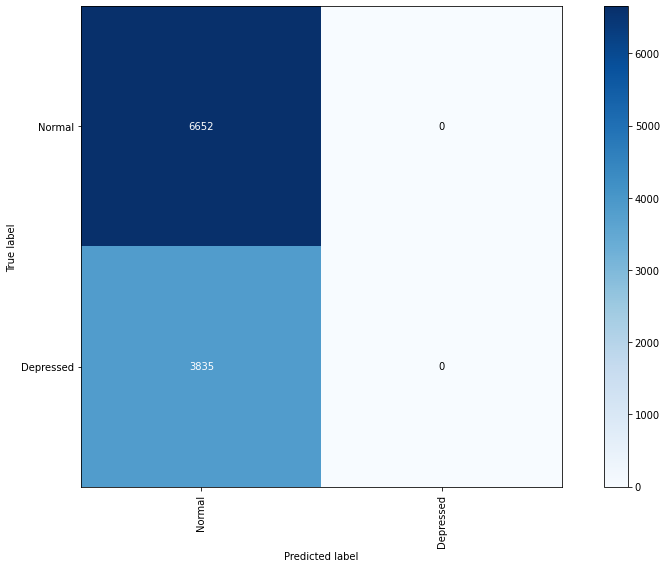

In [ ]:
sim_rnn_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(sim_rnn_cm, ["Normal", "Depressed"])

In [ ]:
print("TEST 1")
print("Original label = " + str(validation_label_1))
print("Predicted label = " + str(y_pred[0]))

TEST 1
Original label = 1
Predicted label = 0


In [ ]:
print("TEST 2")
print("Original label = " + str(validation_label_2))
print("Predicted label = " + str(y_pred[1]))

TEST 2
Original label = 1
Predicted label = 0


### LSTM

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DepressionDetection/LSTM', monitor='val_accuracy', save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(10, input_shape=(X_train.shape[1], 1), activation="tanh", return_sequences=True))
lstm_model.add(LSTM(20, activation="tanh"))
lstm_model.add(Dense(1, activation="sigmoid"))

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1922, 10)          480       
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=150, validation_data=(X_test_reshaped, y_test), callbacks=[checkpoint])

Epoch 1/20
630/630 [==============================] - 1173s 2s/step - loss: 0.6537 - accuracy: 0.6376 - val_loss: 0.6558 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 2/20
630/630 [==============================] - 1168s 2s/step - loss: 0.6536 - accuracy: 0.6378 - val_loss: 0.6556 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 3/20
630/630 [==============================] - 1167s 2s/step - loss: 0.6535 - accuracy: 0.6378 - val_loss: 0.6555 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 4/20
630/630 [==============================] - 1165s 2s/step - loss: 0.6533 - accuracy: 0.6378 - val_loss: 0.6554 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 5/20
630/630 [==============================] - 1173s 2s/step - loss: 0.6531 - accuracy: 0.6378 - val_loss: 0.6551 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 6/20
630/630 [==============================] - 1192s 2s/step - loss: 0.6529 - accuracy: 0.6378 - val_loss: 0.6550 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 7/20
630/630 [==============================] - 1203s 2s/step - loss: 0.6526 - accuracy: 0.6378 - val_loss: 0.6545 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 8/20
630/630 [==============================] - 1205s 2s/step - loss: 0.6521 - accuracy: 0.6378 - val_loss: 0.6537 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 9/20
630/630 [==============================] - 1226s 2s/step - loss: 0.6512 - accuracy: 0.6378 - val_loss: 0.6528 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 10/20
630/630 [==============================] - 1238s 2s/step - loss: 0.6508 - accuracy: 0.6378 - val_loss: 0.6521 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 11/20
630/630 [==============================] - 1231s 2s/step - loss: 0.6503 - accuracy: 0.6378 - val_loss: 0.6521 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 12/20
630/630 [==============================] - 1231s 2s/step - loss: 0.6499 - accuracy: 0.6378 - val_loss: 0.6535 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 13/20
630/630 [==============================] - 1349s 2s/step - loss: 0.6495 - accuracy: 0.6378 - val_loss: 0.6507 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 14/20
630/630 [==============================] - 1264s 2s/step - loss: 0.6490 - accuracy: 0.6378 - val_loss: 0.6500 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 15/20
630/630 [==============================] - 1280s 2s/step - loss: 0.6484 - accuracy: 0.6377 - val_loss: 0.6492 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 16/20
630/630 [==============================] - 1271s 2s/step - loss: 0.6478 - accuracy: 0.6380 - val_loss: 0.6485 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 17/20
630/630 [==============================] - 1258s 2s/step - loss: 0.6473 - accuracy: 0.6381 - val_loss: 0.6475 - val_accuracy: 0.6355


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 18/20
630/630 [==============================] - 1339s 2s/step - loss: 0.6464 - accuracy: 0.6376 - val_loss: 0.6464 - val_accuracy: 0.6375


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 19/20
630/630 [==============================] - 1332s 2s/step - loss: 0.6443 - accuracy: 0.6379 - val_loss: 0.6494 - val_accuracy: 0.6346


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


Epoch 20/20
630/630 [==============================] - 1370s 2s/step - loss: 0.6413 - accuracy: 0.6392 - val_loss: 0.6468 - val_accuracy: 0.6374


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/LSTM/assets


In [ ]:
lstm_model.save("/content/drive/MyDrive/DepressionDetection/LSTM.h5")

In [ ]:
lstm_model = keras.models.load_model("/content/drive/MyDrive/DepressionDetection/LSTM.h5")
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1922, 10)          480       
                                                                 
 lstm_1 (LSTM)               (None, 20)                2480      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_model = lstm_model.predict(X_test_reshaped)
y_pred = []
for predicted in y_pred_model:
  y_pred.append(round(predicted[0]))
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      6652
           1       0.60      0.03      0.05      3835

    accuracy                           0.64     10487
   macro avg       0.62      0.51      0.41     10487
weighted avg       0.62      0.64      0.51     10487



In [ ]:
lstm_model.evaluate(X_test, y_test)

328/328 [==============================] - 70s 212ms/step - loss: 0.6468 - accuracy: 0.6374


[0.6468114852905273, 0.6373605132102966]

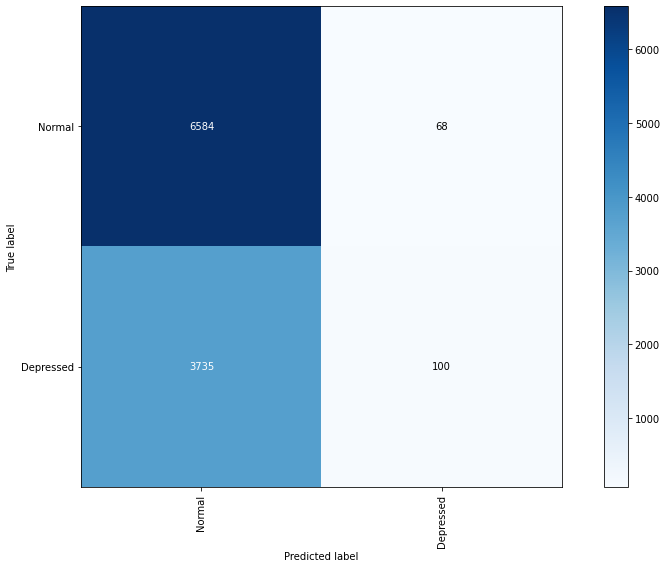

In [ ]:
lstm_model_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(lstm_model_cm, ["Normal", "Depressed"])

In [ ]:
print("TEST 1")
print("Original label = " + str(validation_label_1))
print("Predicted label = " + str(y_pred[0]))

TEST 1
Original label = 1
Predicted label = 0


In [ ]:
print("TEST 2")
print("Original label = " + str(validation_label_2))
print("Predicted label = " + str(y_pred[1]))

TEST 2
Original label = 1
Predicted label = 0


### GRU

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DepressionDetection/GRU', monitor='val_accuracy', save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
gru_model = Sequential()

gru_model.add(GRU(10, input_shape=(X_train.shape[1], 1), activation="tanh", return_sequences=True))
gru_model.add(GRU(20, activation="relu"))
gru_model.add(Dense(1, activation="sigmoid"))

gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1922, 10)          390       
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                1920      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 2,331
Trainable params: 2,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
gru_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=150, validation_data=(X_test_reshaped, y_test), callbacks=[checkpoint])

Epoch 1/20
630/630 [==============================] - 1248s 2s/step - loss: 0.6556 - accuracy: 0.6327 - val_loss: 0.6543 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 2/20
630/630 [==============================] - 1260s 2s/step - loss: 0.6513 - accuracy: 0.6378 - val_loss: 0.6513 - val_accuracy: 0.6343


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 3/20
630/630 [==============================] - 1263s 2s/step - loss: 0.6491 - accuracy: 0.6378 - val_loss: 0.6486 - val_accuracy: 0.6355


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 4/20
630/630 [==============================] - 1275s 2s/step - loss: 0.6468 - accuracy: 0.6379 - val_loss: 0.6478 - val_accuracy: 0.6345


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 5/20
630/630 [==============================] - 1276s 2s/step - loss: 0.6448 - accuracy: 0.6399 - val_loss: 0.6464 - val_accuracy: 0.6368


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 6/20
630/630 [==============================] - 1269s 2s/step - loss: 0.6434 - accuracy: 0.6414 - val_loss: 0.6449 - val_accuracy: 0.6368


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 7/20
630/630 [==============================] - 1273s 2s/step - loss: 0.6426 - accuracy: 0.6411 - val_loss: 0.6444 - val_accuracy: 0.6378


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 8/20
630/630 [==============================] - 1277s 2s/step - loss: 0.6414 - accuracy: 0.6416 - val_loss: 0.6423 - val_accuracy: 0.6393


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 9/20
630/630 [==============================] - 1271s 2s/step - loss: 0.6383 - accuracy: 0.6424 - val_loss: 0.6420 - val_accuracy: 0.6375


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 10/20
630/630 [==============================] - 1267s 2s/step - loss: 0.6336 - accuracy: 0.6437 - val_loss: 0.6374 - val_accuracy: 0.6386


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 11/20
630/630 [==============================] - 1274s 2s/step - loss: 0.6289 - accuracy: 0.6458 - val_loss: 0.6281 - val_accuracy: 0.6399


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 12/20
630/630 [==============================] - 1271s 2s/step - loss: 0.6156 - accuracy: 0.6502 - val_loss: 0.6035 - val_accuracy: 0.6454


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 13/20
630/630 [==============================] - 1274s 2s/step - loss: 0.5903 - accuracy: 0.6589 - val_loss: 0.6017 - val_accuracy: 0.6565


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 14/20
630/630 [==============================] - 1274s 2s/step - loss: 0.5775 - accuracy: 0.6680 - val_loss: 0.5742 - val_accuracy: 0.6687


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 15/20
630/630 [==============================] - 1268s 2s/step - loss: 0.5703 - accuracy: 0.6734 - val_loss: 0.5708 - val_accuracy: 0.6770


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 16/20
630/630 [==============================] - 1269s 2s/step - loss: 0.5632 - accuracy: 0.6802 - val_loss: 0.5664 - val_accuracy: 0.6790


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 17/20
630/630 [==============================] - 1268s 2s/step - loss: 0.5584 - accuracy: 0.6847 - val_loss: 0.5622 - val_accuracy: 0.6816


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 18/20
630/630 [==============================] - 1266s 2s/step - loss: 0.5558 - accuracy: 0.6862 - val_loss: 0.5690 - val_accuracy: 0.6720


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 19/20
630/630 [==============================] - 1269s 2s/step - loss: 0.5534 - accuracy: 0.6889 - val_loss: 0.5655 - val_accuracy: 0.6761


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


Epoch 20/20
630/630 [==============================] - 1267s 2s/step - loss: 0.5497 - accuracy: 0.6901 - val_loss: 0.5503 - val_accuracy: 0.6879


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DepressionDetection/GRU/assets


In [ ]:
gru_model.save("/content/drive/MyDrive/DepressionDetection/GRU.h5")

In [ ]:
gru_model = keras.models.load_model("/content/drive/MyDrive/DepressionDetection/GRU.h5")
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1922, 10)          390       
                                                                 
 gru_1 (GRU)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2,331
Trainable params: 2,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_model = gru_model.predict(X_test_reshaped)
y_pred = []
for predicted in y_pred_model:
  y_pred.append(round(predicted[0]))
print(y_pred)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 

In [ ]:
gru_model.evaluate(X_test, y_test)

328/328 [==============================] - 69s 208ms/step - loss: 0.5503 - accuracy: 0.6879


[0.5502745509147644, 0.6878992915153503]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      6652
           1       0.58      0.53      0.55      3835

    accuracy                           0.69     10487
   macro avg       0.66      0.65      0.66     10487
weighted avg       0.68      0.69      0.68     10487



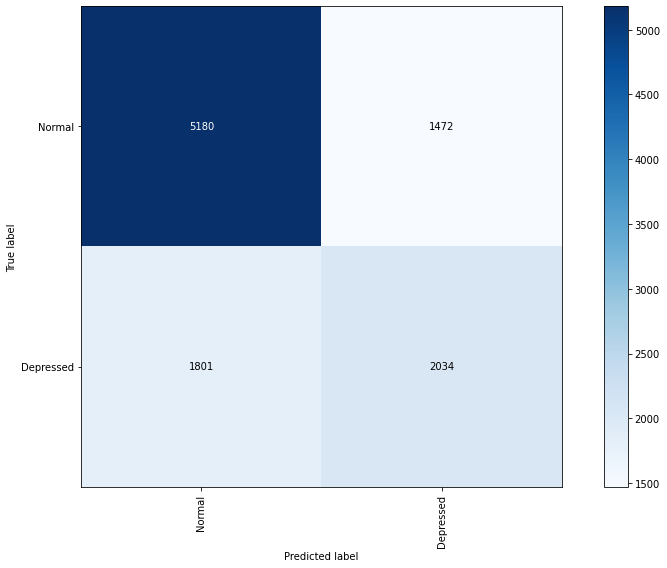

In [ ]:
gru_model_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(gru_model_cm, ["Normal", "Depressed"])

In [ ]:
print("TEST 1")
print("Original label = " + str(validation_label_1))
print("Predicted label = " + str(y_pred[0]))

TEST 1
Original label = 1
Predicted label = 0


In [ ]:
print("TEST 2")
print("Original label = " + str(validation_label_2))
print("Predicted label = " + str(y_pred[1]))

TEST 2
Original label = 1
Predicted label = 0


### Convolution 1D

In [ ]:
conv1d_model = Sequential()

conv1d_model.add(Conv1D(32, kernel_size=3, input_shape=(X_train.shape[1], 1), activation="relu"))
conv1d_model.add(Conv1D(64, kernel_size=3, activation="relu"))
conv1d_model.add(Conv1D(32, kernel_size=3, activation="relu"))
conv1d_model.add(Flatten())
conv1d_model.add(Dense(1, activation="sigmoid"))

conv1d_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1920, 32)          128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1918, 64)          6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1916, 32)          6176      
_________________________________________________________________
flatten (Flatten)            (None, 61312)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61313     
Total params: 73,825
Trainable params: 73,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv1d_model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
conv1d_model.fit(X_train_reshaped, y_train, epochs=20, validation_data=(X_test_reshaped, y_test))

Epoch 1/20
2950/2950 [==============================] - 601s 204ms/step - loss: 0.5973 - accuracy: 0.6926 - val_loss: 0.4930 - val_accuracy: 0.7458
Epoch 2/20
2950/2950 [==============================] - 606s 205ms/step - loss: 0.4633 - accuracy: 0.7694 - val_loss: 0.4730 - val_accuracy: 0.7610
Epoch 3/20
2950/2950 [==============================] - 606s 206ms/step - loss: 0.4127 - accuracy: 0.8026 - val_loss: 0.4106 - val_accuracy: 0.8000
Epoch 4/20
2950/2950 [==============================] - 597s 203ms/step - loss: 0.3803 - accuracy: 0.8240 - val_loss: 0.3672 - val_accuracy: 0.8336
Epoch 5/20
2950/2950 [==============================] - 605s 205ms/step - loss: 0.3562 - accuracy: 0.8380 - val_loss: 0.3505 - val_accuracy: 0.8433
Epoch 6/20
2950/2950 [==============================] - 601s 204ms/step - loss: 0.3401 - accuracy: 0.8493 - val_loss: 0.3293 - val_accuracy: 0.8547
Epoch 7/20
2950/2950 [==============================] - 598s 203ms/step - loss: 0.3208 - accuracy: 0.8595 - val_

In [ ]:
conv1d_model.save("/content/drive/MyDrive/DepressionDetection/Conv1D.h5")

In [ ]:
conv1d_model = keras.models.load_model("/content/drive/MyDrive/DepressionDetection/Conv1D.h5")
conv1d_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1920, 32)          128       
                                                                 
 conv1d_1 (Conv1D)           (None, 1918, 64)          6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 1916, 32)          6176      
                                                                 
 flatten (Flatten)           (None, 61312)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 61313     
                                                                 
Total params: 73,825
Trainable params: 73,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_model = conv1d_model.predict(X_test_reshaped)
y_pred = []
for predicted in y_pred_model:
  y_pred.append(round(predicted[0]))
print(y_pred)

[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 

In [ ]:
conv1d_model.evaluate(X_test_reshaped, y_test)

328/328 [==============================] - 15s 45ms/step - loss: 0.2325 - accuracy: 0.9048


[0.2324669510126114, 0.9048345685005188]

In [ ]:
conv1d_model.fit(X_train_reshaped, y_train, epochs=5, validation_data=(X_test_reshaped, y_test))

Epoch 1/5
2950/2950 [==============================] - 541s 183ms/step - loss: 0.2194 - accuracy: 0.9091 - val_loss: 0.2294 - val_accuracy: 0.9096
Epoch 2/5
2950/2950 [==============================] - 546s 185ms/step - loss: 0.2168 - accuracy: 0.9103 - val_loss: 0.2582 - val_accuracy: 0.8920
Epoch 3/5
2950/2950 [==============================] - 553s 187ms/step - loss: 0.2141 - accuracy: 0.9119 - val_loss: 0.2241 - val_accuracy: 0.9092
Epoch 4/5
2950/2950 [==============================] - 548s 186ms/step - loss: 0.2123 - accuracy: 0.9124 - val_loss: 0.2225 - val_accuracy: 0.9094
Epoch 5/5
2950/2950 [==============================] - 548s 186ms/step - loss: 0.2108 - accuracy: 0.9131 - val_loss: 0.2325 - val_accuracy: 0.9048


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      6652
           1       0.85      0.90      0.87      3835

    accuracy                           0.90     10487
   macro avg       0.89      0.90      0.90     10487
weighted avg       0.91      0.90      0.91     10487



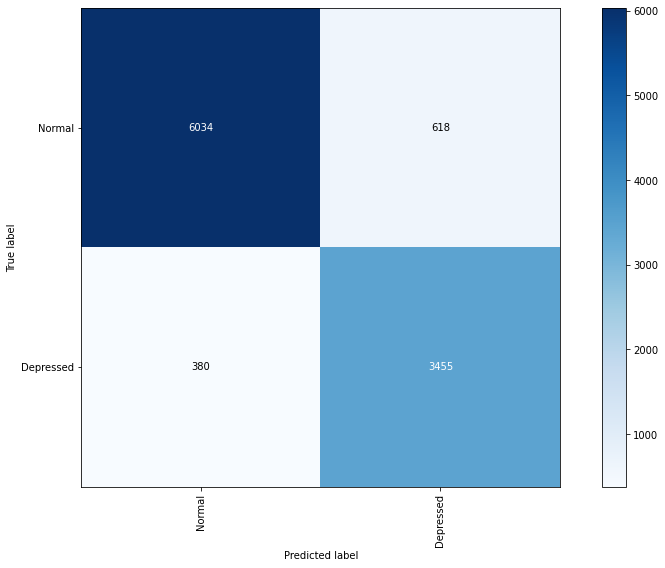

In [ ]:
conv1d_model_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conv1d_model_cm
                      , ["Normal", "Depressed"])

In [ ]:
print("TEST 1")
print("Original label = " + str(validation_label_1))
print("Predicted label = " + str(y_pred[0]))

TEST 1
Original label = 1
Predicted label = 1


In [ ]:
print("TEST 2")
print("Original label = " + str(validation_label_2))
print("Predicted label = " + str(y_pred[1]))

TEST 2
Original label = 1
Predicted label = 1
